# No 1 Prioritas 2

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"

response = requests.get(url).json()

df = pd.json_normalize(response)
df = df[(df['status'] == 'success')]
df.head()

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
5,6,04-11-2023,David Wilson,450.0,gaming,Nintendo Switch,cash,success


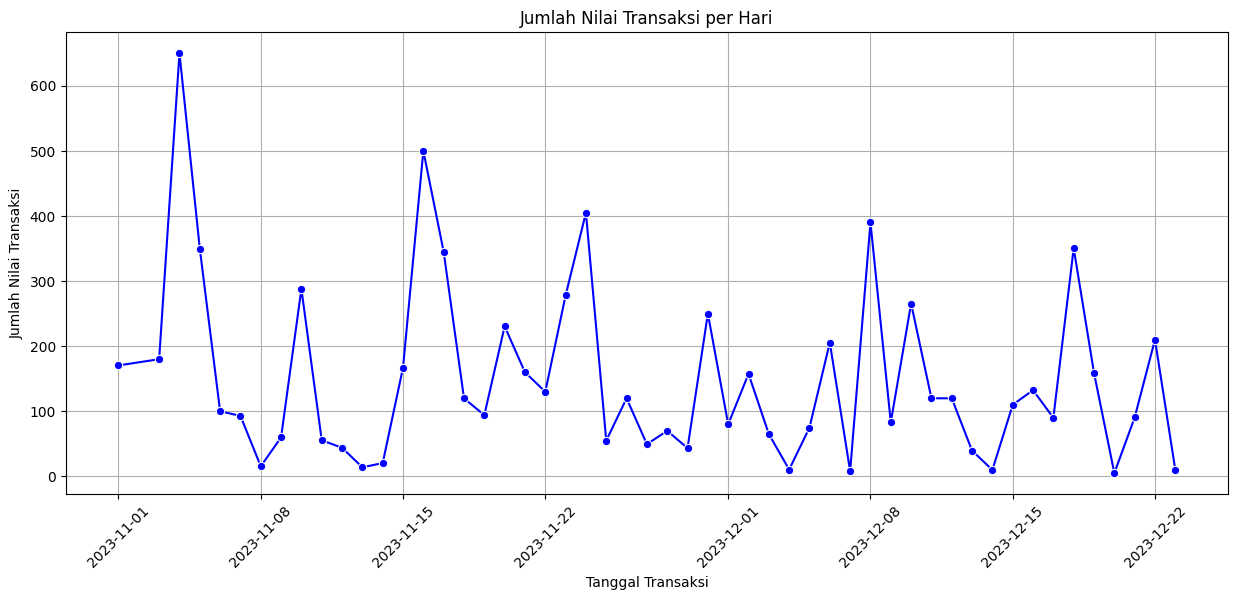

In [3]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
daily_transaction_value = df.groupby('transaction_date')['transaction_amount'].sum()

plt.figure(figsize=(15, 6))
sns.lineplot(data=daily_transaction_value, marker='o', color='blue')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal Transaksi')
plt.ylabel('Jumlah Nilai Transaksi')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

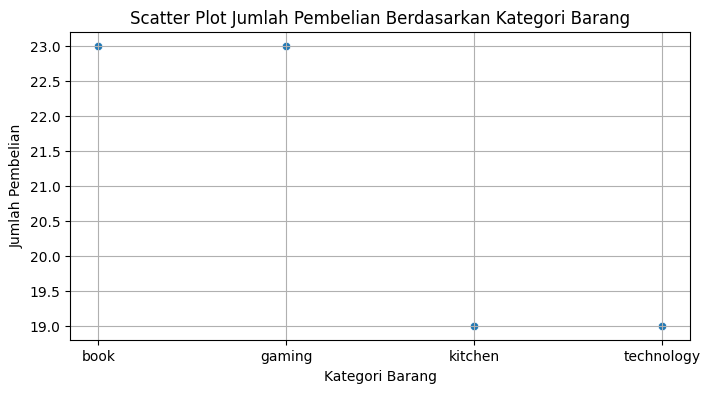

In [5]:
category_item = df['item_category'].value_counts()

plt.figure(figsize=(8, 4))
sns.scatterplot(data=category_item)
plt.title('Scatter Plot Jumlah Pembelian Berdasarkan Kategori Barang')
plt.xlabel('Kategori Barang')
plt.ylabel('Jumlah Pembelian')
plt.grid(True)
plt.show()

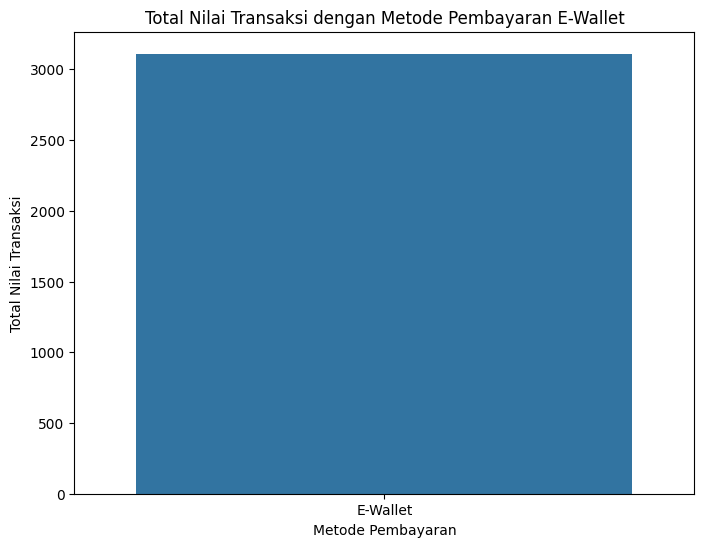

In [6]:
e_wallet = df[(df['payment_method'] == 'e wallet')]
total_ewallet_transaction = e_wallet['transaction_amount'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=['E-Wallet'], y=[total_ewallet_transaction])
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Nilai Transaksi')
plt.title('Total Nilai Transaksi dengan Metode Pembayaran E-Wallet')
plt.show()

Nilai maksimum: 500.0
Nilai minimum: 5.0
Nilai median: 50.25


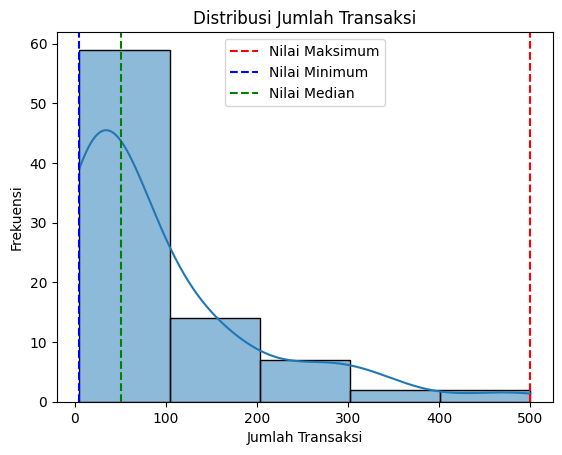

In [7]:
max_value = df['transaction_amount'].max()
min_value = df['transaction_amount'].min()
median_value = df['transaction_amount'].median()

print("Nilai maksimum:", max_value)
print("Nilai minimum:", min_value)
print("Nilai median:", median_value)

sns.histplot(df['transaction_amount'], bins=5, kde=True)
plt.title('Distribusi Jumlah Transaksi')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Frekuensi')
plt.axvline(x=max_value, color='red', linestyle='--', label='Nilai Maksimum')
plt.axvline(x=min_value, color='blue', linestyle='--', label='Nilai Minimum')
plt.axvline(x=median_value, color='green', linestyle='--', label='Nilai Median')
plt.legend()
plt.show()